<a href="https://colab.research.google.com/github/VoKhoiNhon/Ml2023/blob/main/Lab_9_20130355_VoKhoiNhon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The main aim of this lab is to deal with the pipeline technique and MultilayerPerceptron algorithm

*   **Deadline: 23:59, 24/4/2023**



# Import libraries

In [ ]:
# code
from sklearn.utils.fixes import sklearn
from sklearn import datasets
from sklearn import svm 
from sklearn import metrics as m
from sklearn import tree 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as knc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.stats import mode
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB 
from sklearn import feature_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import set_config 
from sklearn.neural_network import MLPClassifier

#Task 1. With **iris** dataset
*  Apply **pipeline** including preprocessing steps (i.e., StandardScaler, **SimpleImputer**, **feature selection**, **KBinsDiscretizer**, …) and classification algorithms (i.e., **Random forest, kNN, Naïve Bayes**). 


In [ ]:
data = datasets.load_iris()
X_train,X_test, y_train, y_test = tts(data['data'], data['target'], test_size=0.3, random_state=1)

Accuracy: 0.9555555555555556
Precision: 0.9558404558404558
Recall: 0.9558404558404558
F1: 0.9558404558404558
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



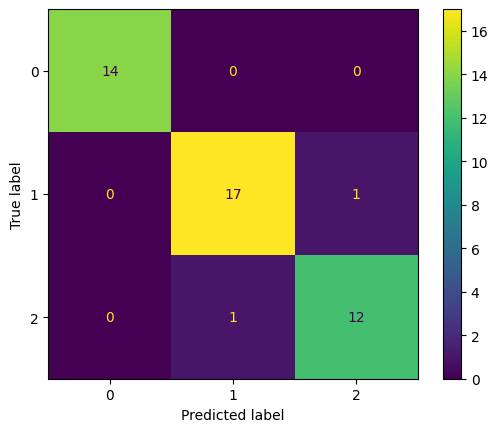

In [ ]:
#code

pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', RandomForestClassifier(n_estimators=100))]) 
pipe_lr.fit(X_train, y_train) 
y_predict=pipe_lr.predict(X_test)  
pipe_lr.score(X_test, y_test)  
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

In [ ]:
set_config(display="diagram") 
pipe_lr 

Pipeline(steps=[('scl', StandardScaler()), ('clf', RandomForestClassifier())])

#Task 2. With **mnist** dataset: 
*   2.1. Apply **MultilayerPerceptron** classification with 1 hidden layer 
having 10 nodes

In [ ]:
data = datasets.load_digits()
X_train,X_test, y_train, y_test = tts(data['data'], data['target'], test_size=0.3, random_state=1)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9351851851851852
Precision: 0.9346115457025986
Recall: 0.934856452531679
F1: 0.9343930317125743
[[57  0  0  0  1  1  0  0  0  0]
 [ 1 46  0  0  0  0  0  0  2  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  2 57  0  0  0  1  4  0]
 [ 1  1  0  0 57  0  0  2  0  0]
 [ 0  0  0  2  0 42  0  2  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 54  1  1]
 [ 0  2  1  2  0  1  0  0 39  1]
 [ 0  0  0  1  0  0  0  1  2 53]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.94      0.94      0.94        49
           2       0.94      1.00      0.97        49
           3       0.92      0.89      0.90        64
           4       0.97      0.93      0.95        61
           5       0.95      0.89      0.92        47
           6       1.00      1.00      1.00        51
           7       0.90      0.95      0.92        57
           8       0.81      0.85      0.83        46
           9       0

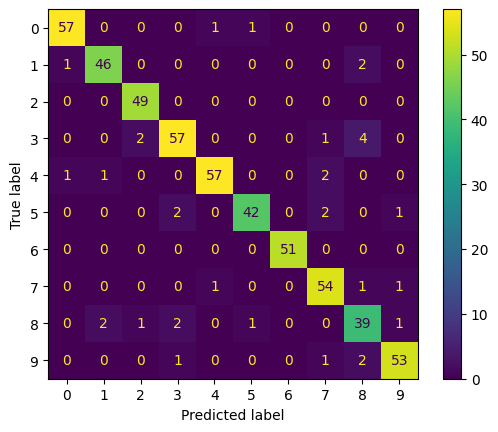

In [ ]:
# code

clf = MLPClassifier(hidden_layer_sizes=10)
clf.fit(X_train,y_train)
y_predict=clf.predict(X_test)  
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

*   2.2. Apply **Multilayerperceptron** algorithm with the following settings (the first hidden layer has 250 neuron, the second one has 100 neurons). 

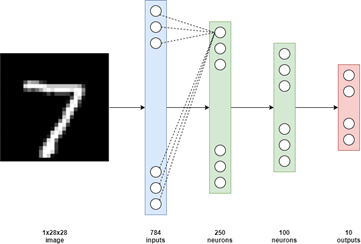

Accuracy: 0.9814814814814815
Precision: 0.9811708041344772
Recall: 0.9811885019704354
F1: 0.9810387687423147
[[58  0  0  0  1  0  0  0  0  0]
 [ 0 46  1  0  0  0  1  0  0  1]
 [ 0  0 48  0  0  0  0  1  0  0]
 [ 0  0  0 63  0  0  0  0  1  0]
 [ 0  0  0  0 61  0  0  0  0  0]
 [ 1  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  1]
 [ 0  0  0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  2  0  0  0 55]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       1.00      0.94      0.97        49
           2       0.98      0.98      0.98        49
           3       1.00      0.98      0.99        64
           4       0.98      1.00      0.99        61
           5       0.96      0.98      0.97        47
           6       0.98      1.00      0.99        51
           7       0.98      0.98      0.98        57
           8       0.98      1.00      0.99        46
           9       

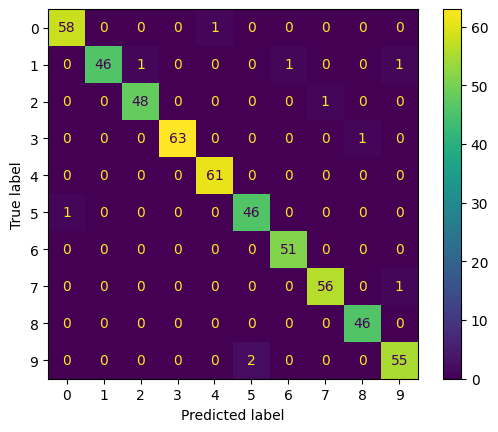

In [ ]:
# code
clf = MLPClassifier(hidden_layer_sizes=(250,100))
clf.fit(X_train,y_train)
y_predict=clf.predict(X_test)  
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

*   2.3. Find the best hyper parameters using **GridSearchCV**

In [ ]:
#code
param_grid = {
 'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
 'max_iter': [50, 100, 150],
 'activation': ['tanh', 'relu'],
 'solver': ['sgd', 'adam'],
 'alpha': [0.0001, 0.05],
 'learning_rate': ['constant','adaptive'],
 }
GSCV=['GridSearchCV']
RF=['RandomForest ']
NB=['Navie Bayes']
clf = MLPClassifier()
gs_CV=GridSearchCV(estimator=clf, param_grid=param_grid,scoring='accuracy', n_jobs=-1, refit=True, return_train_score=True, cv= 4)
gs_CV.fit(X_train, y_train)
y_predict=gs_CV.predict(X_test)
print(gs_CV.best_params_)
print(gs_CV.best_estimator_)
print(y_predict)
print(gs_CV.best_score_)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
GSCV.append(str(round(ac,2)))
GSCV.append(str(round(ps,2)))
GSCV.append(str(round(rs,2)))
GSCV.append(str(round(fs,2)))
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 5 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 4 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 3 9 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 9 5 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 9 9 2 8 1 9 8 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 7 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 3 2 6 6 7 1 0 8 4 8 9 5 4 5 2 5 3 3 3 5 1 8 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 9 4 0 2 6 9 3 

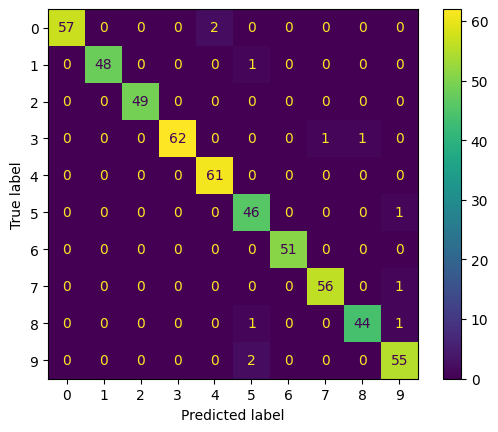

In [ ]:
#random Forest
clf=RandomForestClassifier() 
clf.fit(X_train,y_train) 
y_predict = clf.predict(X_test) 
print(y_predict)
rf_ac = m.accuracy_score(y_test, y_predict)
rf_ps = m.precision_score(y_test, y_predict, average='macro')
rf_rs = m.recall_score(y_test, y_predict, average='macro')
rf_fs = m.f1_score(y_test, y_predict, average='macro')
RF.append(str(round(rf_ac,2)))
RF.append(str(round(rf_ps,2)))
RF.append(str(round(rf_rs,2)))
RF.append(str(round(rf_fs,2)))
print('Accuracy:',rf_ac)
print('Precision:',rf_ps)
print('Recall:',rf_rs)
print('F1:',rf_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 8 8 6 0 7 6 1 9 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 8 8 3 3 4 0 3 7 4
 7 0 2 7 7 3 1 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 9 3 9 0 2 9 9 2 3
 2 8 1 8 9 6 2 0 4 8 5 4 4 7 6 8 6 6 1 7 5 6 3 8 3 7 2 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 9 8 9 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 7 2 7 6 1 6 8 4 0 3 1 0 9 9 9 4 1 8 6 8 0 9 5 9 8 2 3 9 3
 0 8 7 7 0 3 3 3 6 3 3 2 9 2 6 9 0 4 2 2 7 9 2 6 7 6 8 7 1 9 3 4 0 6 4 8 5
 3 6 3 2 4 0 4 4 9 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 8 8 5 0 9 6 0 1 8 2 0 9
 5 6 8 0 5 0 9 2 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 9 7 6 4 6 2 9 4 7 1 3 7 8
 8 6 9 8 8 2 4 8 7 5 5 6 9 9 9 5 0 0 4 9 9 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 2 9 2 9 8 7 0 1 3 8 9 8 1 1 9 8 3 0 0 7 3 1
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 7 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 5 2 6 6 7 1 0 8 4 8 9 5 4 5 2 5 3 3 3 5 1 8 7 6 8 3 6 2 5 2 6 4
 5 4 4 9 7 9 4 0 2 6 9 3 

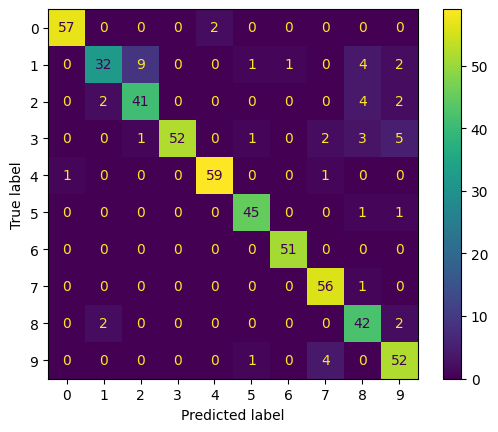

In [ ]:
#navie bayes
clf = MultinomialNB() 
clf.fit(X_train,y_train) 
y_predict = clf.predict(X_test) 
print(y_predict)
nb_ac = m.accuracy_score(y_test, y_predict)
nb_ps = m.precision_score(y_test, y_predict, average='macro')
nb_rs = m.recall_score(y_test, y_predict, average='macro')
nb_fs = m.f1_score(y_test, y_predict, average='macro')
NB.append(str(round(nb_ac,2)))
NB.append(str(round(nb_ps,2)))
NB.append(str(round(nb_rs,2)))
NB.append(str(round(nb_fs,2)))
print('Accuracy:',nb_ac)
print('Precision:',nb_ps)
print('Recall:',nb_rs)
print('F1:',nb_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

*   2.4. Compare the MultilayerPerceptron using the best hyper parameters in 2.3 and other classification algorithms (i.e., Random forest, kNN, Naïve Bayes)  in termns of accuracy, precision, recall, and F1

In [32]:
#code
t = PrettyTable([' ', 'Acc', 'Pre', 'Recall', 'F1'])
t.add_row(GSCV)
t.add_row(NB)
t.add_row(RF)
print(t)


+---------------+------+------+--------+------+
|               | Acc  | Pre  | Recall |  F1  |
+---------------+------+------+--------+------+
|  GridSearchCV | 0.92 | 0.91 |  0.92  | 0.92 |
|  Navie Bayes  | 0.79 | 0.78 |  0.77  | 0.77 |
| RandomForest  | 0.96 | 0.96 |  0.95  | 0.95 |
+---------------+------+------+--------+------+


#Task 3. With **spambase** dataset: 

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'


Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


In [22]:
data = pd.read_csv('spambase.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=1)
GSCV=['GridSearchCV']
RF=['RandomForest ']
NB=['Navie Bayes']

*   3.1. Apply **GridSearchCV** to **MultilayperPerceptron** to find the best hyperparameters (the setting of hyperparameters chosen by students)

In [26]:
#code
param_grid = {
 'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
 'max_iter': [50, 100, 150],
 'activation': ['tanh', 'relu'],
 'solver': ['sgd', 'adam'],
 'alpha': [0.0001, 0.05],
 'learning_rate': ['constant','adaptive'],
 }
clf = MLPClassifier()
gs_CV=GridSearchCV(estimator=clf, param_grid=param_grid,scoring='accuracy', n_jobs=-1, refit=True, return_train_score=True, cv=3)
gs_CV.fit(X_train, y_train)
y_predict=gs_CV.predict(X_test)
print(gs_CV.best_params_)
print(gs_CV.best_estimator_)
print(y_predict)
print(gs_CV.best_score_)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
GSCV.append(str(round(ac,2)))
GSCV.append(str(round(ps,2)))
GSCV.append(str(round(rs,2)))
GSCV.append(str(round(fs,2)))
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100, 50, 30), 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'adam'}
MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(100, 50, 30),
              max_iter=50)
[0 0 1 ... 1 0 0]
0.9344728083892021
Accuracy: 0.9196234612599565
Precision: 0.9124590184983864
Recall: 0.9243966618223456
F1: 0.9169450228292688


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
print(GSCV)

['GridSearchCV', '0.92', '0.91', '0.92', '0.92']


*   3.2. Compare the **MultilayerPerceptron** using the best hyper parameters in 3.1) and other classification algorithms (i.e., Random forest, kNN, Naïve Bayes)  in termns of accuracy, precision, recall, and F1

[1 1 1 ... 1 0 0]
Accuracy: 0.9572773352643013
Precision: 0.9581317234298978
Recall: 0.9519982824679614
F1: 0.9548533019053493
[[821  20]
 [ 39 501]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       841
           1       0.96      0.93      0.94       540

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.95      1381
weighted avg       0.96      0.96      0.96      1381



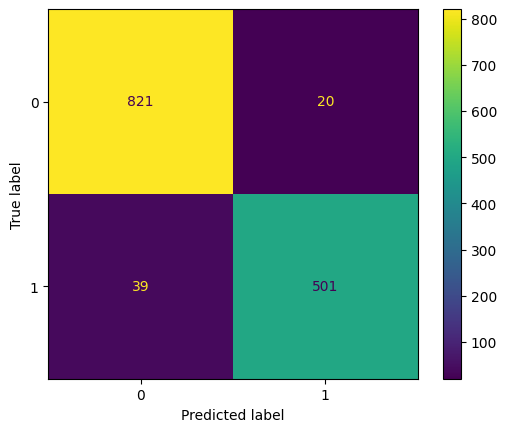

In [23]:
#random Forest
clf=RandomForestClassifier() 
clf.fit(X_train,y_train) 
y_predict = clf.predict(X_test) 
print(y_predict)
rf_ac = m.accuracy_score(y_test, y_predict)
rf_ps = m.precision_score(y_test, y_predict, average='macro')
rf_rs = m.recall_score(y_test, y_predict, average='macro')
rf_fs = m.f1_score(y_test, y_predict, average='macro')
RF.append(str(round(rf_ac,2)))
RF.append(str(round(rf_ps,2)))
RF.append(str(round(rf_rs,2)))
RF.append(str(round(rf_fs,2)))
print('Accuracy:',rf_ac)
print('Precision:',rf_ps)
print('Recall:',rf_rs)
print('F1:',rf_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[0 0 1 ... 1 0 0]
Accuracy: 0.7856625633598842
Precision: 0.7752606664535152
Recall: 0.7729841018188224
F1: 0.7740560426975136
[[699 142]
 [154 386]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       841
           1       0.73      0.71      0.72       540

    accuracy                           0.79      1381
   macro avg       0.78      0.77      0.77      1381
weighted avg       0.78      0.79      0.79      1381



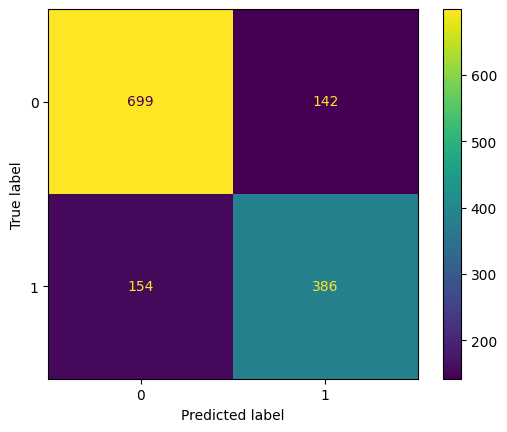

In [24]:
#code#navie bayes
clf = MultinomialNB() 
clf.fit(X_train,y_train) 
y_predict = clf.predict(X_test) 
print(y_predict)
nb_ac = m.accuracy_score(y_test, y_predict)
nb_ps = m.precision_score(y_test, y_predict, average='macro')
nb_rs = m.recall_score(y_test, y_predict, average='macro')
nb_fs = m.f1_score(y_test, y_predict, average='macro')
NB.append(str(round(nb_ac,2)))
NB.append(str(round(nb_ps,2)))
NB.append(str(round(nb_rs,2)))
NB.append(str(round(nb_fs,2)))
print('Accuracy:',nb_ac)
print('Precision:',nb_ps)
print('Recall:',nb_rs)
print('F1:',nb_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

In [31]:
#code
t = PrettyTable([' ', 'Acc', 'Pre', 'Recall', 'F1',])
t.add_row(GSCV)
t.add_row(NB)
t.add_row(RF)
print(t)


+---------------+------+------+--------+------+
|               | Acc  | Pre  | Recall |  F1  |
+---------------+------+------+--------+------+
|  GridSearchCV | 0.92 | 0.91 |  0.92  | 0.92 |
|  Navie Bayes  | 0.79 | 0.78 |  0.77  | 0.77 |
| RandomForest  | 0.96 | 0.96 |  0.95  | 0.95 |
+---------------+------+------+--------+------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.